<a href="https://colab.research.google.com/github/alejandrolq/StaticalLearningII-Practicas/blob/main/Practica2_Anomalias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre: José Alejandro López Quel**

**Carné: 21001127**

**Statical Learning II**

**Sección U**

**Práctica 2**

## Importando librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split

## Detección de Anomalías

### Leyendo los datos

In [ ]:
## Importando datos de estaturas normales
df  = pd.read_csv('estaturas_normales.csv', header=None)
df

,0,1
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32
5,1.66,29
6,1.64,27
7,1.85,34
8,1.85,26
9,1.75,21


In [ ]:
## Importando datos de estaturas anomalas
anomalias = pd.read_csv('estaturas_anomalias.csv', header=None)
anomalias

,0,1
0,0.25,2.4
1,175.10,2.5
2,0.15,250.0
3,150.00,14.0


In [ ]:
## Importando datos de estaturas normales test
test = pd.read_csv('estaturas_valtest.csv', header=None)
test

,0,1
0,1.82,25
1,1.80,27
2,1.60,31
3,1.60,35
4,1.82,30
5,1.76,32
6,1.79,31
7,1.61,31


### Convirtiendo los datos en arreglos de Numpy

In [ ]:
df = df.to_numpy()
anomalias = anomalias.to_numpy()
test = test.to_numpy()

### Definición de funciones a utilizar

In [ ]:
## Función para obtener los datos de la distribución Gaussiana (media, desviación)
def GaussianDist(dataset):
  mu = np.mean(dataset, axis=0)
  sigma = np.cov(dataset.T)
  return mu, sigma

In [ ]:
## Función para obtener la densidad de probabilidad (pdf)
def multivariateGaussian(dataset, mu, sigma):
  dist = multivariate_normal(mu, sigma)
  pdf = dist.pdf(dataset)
  return pdf

In [ ]:
## Función para detectar anomalías
def DetectAnomalies(pdf, epsilon):
  probabilidades = pdf[pdf < epsilon]
  anomalias = np.argwhere(pdf < epsilon)
  return probabilidades, anomalias

In [ ]:
## Función para seleccionar epsilon
def selectThresholdByCV(probabilidades, gt):
  best_epsilon = 0
  best_f1 = 0
  f = 0
  stepsize = (max(probabilidades) - min(probabilidades))/1000
  epsilons = np.arange(min(probabilidades), max(probabilidades), stepsize)
  for epsilon in np.nditer(epsilons):
    predicciones = (probabilidades < epsilon)
    f = f1_score(gt, list(map(int, predicciones)), average = 'binary')
    if f > best_f1:
      best_f1 = f
      best_epsilon = epsilon
  return best_f1, best_epsilon

### Obteniendo la pdf para los datos de entrenamiento

In [ ]:
mu, sigma = GaussianDist(df)

In [ ]:
p = multivariateGaussian(df,mu,sigma)
p

array([2.57802663e-01, 3.15212566e-01, 2.40695991e-01, 2.02469797e-01,
       1.64508317e-01, 2.16025395e-01, 1.58480821e-01, 7.69923850e-02,
       8.53276764e-02, 1.39857979e-01, 2.10092298e-01, 1.96810644e-01,
       1.17311331e-01, 1.59888368e-01, 1.96810644e-01, 2.37801655e-01,
       2.76045627e-01, 3.14585116e-02, 1.96933292e-01, 3.06012351e-01,
       2.64374860e-01, 5.09744789e-02, 7.69940627e-02, 1.17311331e-01,
       1.16373351e-01, 2.41638811e-01, 2.00484603e-02, 3.05619742e-01,
       2.55869237e-01, 1.85543378e-01, 2.94907304e-01, 1.92363359e-02,
       2.41368618e-01, 2.71291092e-01, 1.14184400e-04, 1.88829274e-01,
       2.41949998e-01, 1.77801822e-01, 2.10092298e-01, 1.35189530e-02,
       2.94907304e-01, 1.28934265e-01])

### Preparación de datos para cross-validation y test

In [ ]:
## Se agrega una columna para identificar los datos si son anomalias (y=1) o 
## datos normales (y=0)
anomalias_l = np.hstack((anomalias,np.ones((anomalias.shape[0],1))))
test_l = np.hstack((test,np.zeros((test.shape[0],1))))

In [ ]:
## Se unen los datos 
m_data = np.vstack((anomalias_l, test_l))
m_data

array([[2.500e-01, 2.400e+00, 1.000e+00],
       [1.751e+02, 2.500e+00, 1.000e+00],
       [1.500e-01, 2.500e+02, 1.000e+00],
       [1.500e+02, 1.400e+01, 1.000e+00],
       [1.820e+00, 2.500e+01, 0.000e+00],
       [1.800e+00, 2.700e+01, 0.000e+00],
       [1.600e+00, 3.100e+01, 0.000e+00],
       [1.600e+00, 3.500e+01, 0.000e+00],
       [1.820e+00, 3.000e+01, 0.000e+00],
       [1.760e+00, 3.200e+01, 0.000e+00],
       [1.790e+00, 3.100e+01, 0.000e+00],
       [1.610e+00, 3.100e+01, 0.000e+00]])

In [ ]:
## Se mezclan los datos
np.random.shuffle(m_data)

array([[1.600e+00, 3.100e+01, 0.000e+00],
       [1.820e+00, 2.500e+01, 0.000e+00],
       [2.500e-01, 2.400e+00, 1.000e+00],
       [1.820e+00, 3.000e+01, 0.000e+00],
       [1.800e+00, 2.700e+01, 0.000e+00],
       [1.610e+00, 3.100e+01, 0.000e+00],
       [1.751e+02, 2.500e+00, 1.000e+00],
       [1.600e+00, 3.500e+01, 0.000e+00],
       [1.760e+00, 3.200e+01, 0.000e+00],
       [1.500e-01, 2.500e+02, 1.000e+00],
       [1.500e+02, 1.400e+01, 1.000e+00],
       [1.790e+00, 3.100e+01, 0.000e+00]])

In [ ]:
## Se dividen los datos para cross-validation
half = int(m_data.shape[0]/2)
cv_data = m_data[:half, :]
cv_data

array([[ 1.6 , 31.  ,  0.  ],
       [ 1.82, 25.  ,  0.  ],
       [ 0.25,  2.4 ,  1.  ],
       [ 1.82, 30.  ,  0.  ],
       [ 1.8 , 27.  ,  0.  ],
       [ 1.61, 31.  ,  0.  ]])

In [ ]:
## Se dividen los datos para test
test_data = m_data[half:, :]
test_data

array([[1.751e+02, 2.500e+00, 1.000e+00],
       [1.600e+00, 3.500e+01, 0.000e+00],
       [1.760e+00, 3.200e+01, 0.000e+00],
       [1.500e-01, 2.500e+02, 1.000e+00],
       [1.500e+02, 1.400e+01, 1.000e+00],
       [1.790e+00, 3.100e+01, 0.000e+00]])

### Empleando cross-validation para obtener epsilon

In [ ]:
p_cv = multivariateGaussian(cv_data[:,:1],mu,sigma)
fscore, ep = selectThresholdByCV(p_cv,cv_data[:,2])
print(fscore, ep)

1.0 1.353006213184104e-08


### Utilizando los datos de test para encontrar anomalías

In [ ]:
p_test = multivariateGaussian(test_data[:,:1],mu,sigma)
probabilidades, anomalias = DetectAnomalies(p_test, ep)
print(anomalias)

[[0]
 [3]
 [4]]


### Comparando datos obtenidos con los datos de anomalías

In [ ]:
np.argwhere(test_data[:,2] == 1)

array([[0],
       [3],
       [4]])

In [ ]:
predicciones_test = (p_test < ep)
predicciones_test
f1_score(test_data[:,2], list(map(int, predicciones_test)), average = 'binary')

1.0

In [ ]:
anomalias_p = np.asarray(np.where(p_test < ep))

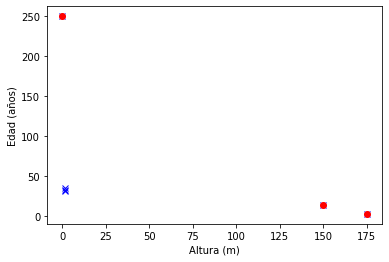

In [ ]:
plt.figure()
plt.xlabel('Altura (m)')
plt.ylabel('Edad (años)')
plt.plot(test_data[:,0],test_data[:,1],'bx')
plt.plot(test_data[anomalias_p,0],test_data[anomalias_p,1],'ro')
plt.show()

## Conclusiones

- Se determinó que despúes de realizar las pruebas en los datasets correspondientes, utilizando un modelo de detección de anomalías de distribución gausiana multivariable, que emplear un epsilon de 1.353006213184104e-08 como umbral para la detección de anomalías en este modelo obtiene un buen rendimiento.
- Con el epsilon antes mencionado se obtiene un f_score de 1.
- Se observa en la gráfica de los datos de prueba comparada con las anomalías encontradas que existe una diferencia significativa.